In [35]:
!pip3 install --upgrade pandas
!pip3 install --upgrade seaborn
!pip3 install --upgrade numpy 
!pip3 install --upgrade matplotlib
!pip3 install --upgrade math
!pip3 install --upgrade scipy
!pip3 install --upgrade datetime

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.23.4)
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)
    100% |████████████████████████████████| 17.3MB 1.8MB/s 
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
    100% |████████████████████████████████| 12.9MB 3.5MB/s 
    100% |████████████████████████████████| 952kB 18.3MB/s 
yellowbrick 0.9 has requirement matplotlib<3.0,>=1.5.1, but you'll have matplotlib 3.0.2 which is incompatible.
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2
  Could not find a version that satisfies the requirement math (from versions: )
N

In [0]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 
import seaborn as sns

In [0]:
sales = pd.read_excel('Online Retail.xlsx')

In [9]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Understand Data through EDA

In [10]:
#Find Number of Unique Customers
len(sales.CustomerID.unique())

4373

In [11]:
#Analyze orders by top 10 customers and what propertion they are of all orders
(sales.CustomerID.value_counts()/sum(sales.CustomerID.value_counts())*100).head(13).cumsum()
#10% of all sells come from top 13 customers
#This is expected as some customers are wholesalers 

17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
15039.0    9.265809
14156.0    9.614850
18118.0    9.930462
Name: CustomerID, dtype: float64

In [12]:
#check for unique products
len(sales.StockCode.unique())

4070

In [13]:
#check for unique descriptions
len(sales.Description.unique())
#We have a mistmatch between Product and Description

4224

In [0]:
prod_desc = sales.groupby(['StockCode','Description']).count().reset_index()

In [15]:
prod_desc.StockCode.value_counts()[prod_desc.StockCode.value_counts()>1].reset_index()

#One product having multiple descriptions
sales[sales['StockCode'] == prod_desc.StockCode.value_counts()[prod_desc.StockCode.value_counts()>1]
      .reset_index()['index'][2]]['Description'].unique()

array(['ASSORTED CREEPY CRAWLIES', 'MERCHANT CHANDLER CREDIT ERROR, STO',
       'sold as 1', '?', 'damaged', 'OOPS ! adjustment', nan],
      dtype=object)

In [16]:
#Find top selling countries
sales.Country.value_counts().reset_index().head(10)

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [17]:
#Sales Quantity
sales.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [18]:
#Sales Unit Price
sales.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

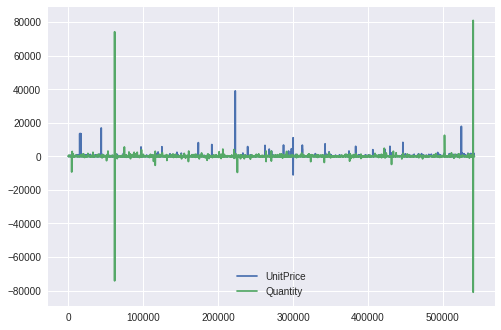

In [19]:
sales[['UnitPrice','Quantity']].plot()
#We can claerly see there are some return transactions

## Data Cleaning and Geographical Separation

### RFM—Recency, Frequency and Monetary Value—based model of customer value for finding our customer segments

In [20]:
sales = sales[sales.Country=='United Kingdom']

#Create Total Amount
sales['Amount'] = sales.Quantity*sales.UnitPrice

#Remove Return Transactions
sales = sales[~(sales.Amount<0)]

#Remove Customer ID null Fields
sales = sales[~(sales.CustomerID.isnull())]
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


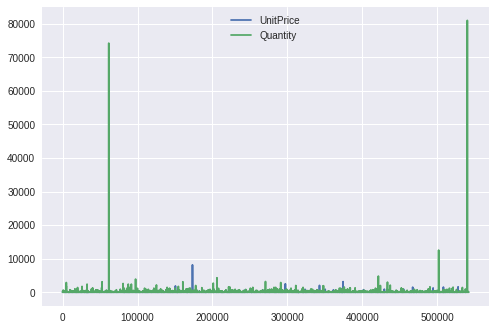

In [21]:
sales[['UnitPrice','Quantity']].plot()

# Create Recency-Monetary-Frequency Features

In [22]:
reference_date = sales.InvoiceDate.max() + datetime.timedelta(days=1)
print(reference_date)

sales['DaysLastPurchase'] = (reference_date-sales.InvoiceDate).astype('timedelta64[D]')
customer_history = 0
customer_history = sales.groupby('CustomerID').min().reset_index()[['CustomerID','DaysLastPurchase']]
customer_history.rename(columns={'DaysLastPurchase':'Recency'},inplace=True)
customer_history.head()

2011-12-10 12:49:00


,CustomerID,Recency
0,12346.0,326.0
1,12747.0,2.0
2,12748.0,1.0
3,12749.0,4.0
4,12820.0,3.0


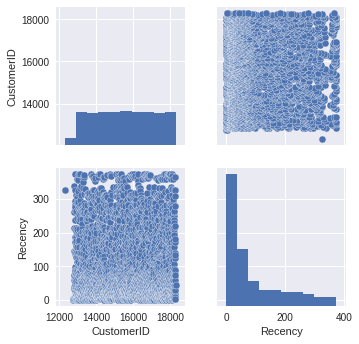

In [23]:
sns.pairplot(customer_history)

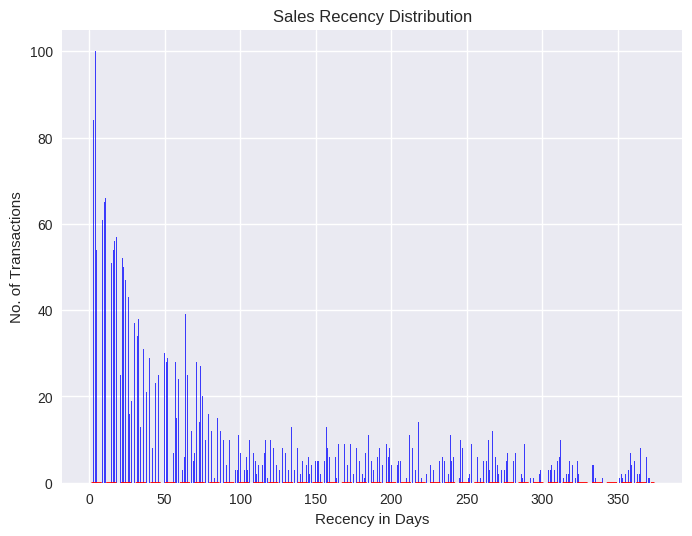

In [24]:
#Check Distribution of Recency 
mu = np.mean(customer_history.Recency)
sigma = np.std(customer_history.Recency)
plt.figure(figsize=(8,6),dpi=100)
n,bins,pathces = plt.hist(customer_history.Recency,1000,facecolor='blue',alpha=0.75)
#add best fit line
y = mlab.normpdf(bins,mu,sigma)
l = plt.plot(bins,y,'r--',linewidth=2)
plt.xlabel('Recency in Days')
plt.ylabel('No. of Transactions')
plt.title('Sales Recency Distribution')
plt.grid(True)

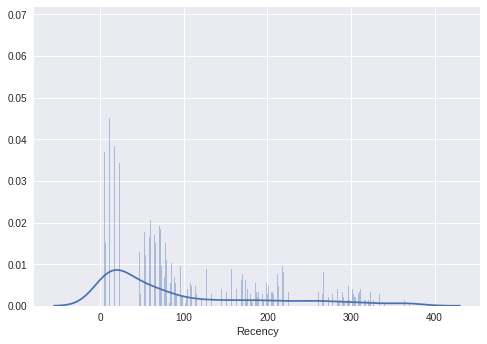

In [25]:
sns.distplot(customer_history.Recency,bins=1000)

In [0]:
#Frequency and Monetary Value
customer_freq = sales[['CustomerID','Amount']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Amount':'Frequency'},inplace=True)
customer_history = customer_history.merge(customer_freq,how='outer')
customer_monetary = sales[['CustomerID','Amount']].groupby('CustomerID').sum().reset_index()
customer_history = customer_history.merge(customer_monetary,how='outer')
customer_history.Amount = customer_history.Amount+0.001

In [27]:
customer_history.head(5)

,CustomerID,Recency,Frequency,Amount
0,12346.0,326.0,1,77183.601
1,12747.0,2.0,103,4196.011
2,12748.0,1.0,4596,33719.731
3,12749.0,4.0,199,4090.881
4,12820.0,3.0,59,942.341


#### Sclae data and log transform for K-Means Clustering 

In [28]:
from sklearn.preprocessing import StandardScaler
customer_history[['Recency_log','Frequency_log','Amount_log']] = np.log(customer_history[['Recency','Frequency','Amount']])
X = customer_history[['Amount_log', 'Recency_log','Frequency_log']].values
X

array([[11.25394229,  5.78689738,  0.        ],
       [ 8.34188959,  0.69314718,  4.63472899],
       [10.42583843,  0.        ,  8.43294164],
       ...,
       [ 5.18207003,  2.07944154,  2.48490665],
       [ 7.64725203,  1.38629436,  6.62804138],
       [ 7.51604204,  3.76120012,  4.24849524]])

In [0]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

Text(0.5,1,'Distribution of Log Customer Monetary Value')

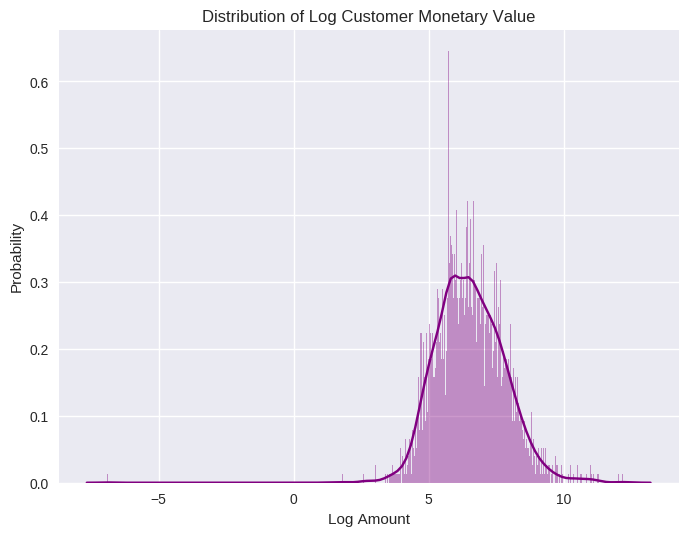

In [30]:
plt.figure(figsize=(8,6), dpi=100)
plt.grid(True)
sns.distplot(customer_history.Amount_log,bins=1000,color='purple')
plt.xlabel('Log Amount')
plt.ylabel('Probability')
plt.title('Distribution of Log Customer Monetary Value')

In [0]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0,'Monerary')

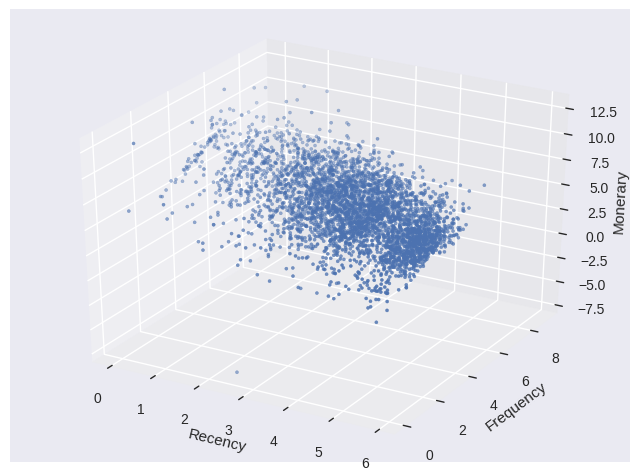

In [32]:
fig = plt.figure(figsize=(8,6), dpi =100)
ax = fig.add_subplot(111,projection='3d')
ax.scatter(customer_history.Recency_log,customer_history.Frequency_log,customer_history.Amount_log,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monerary')

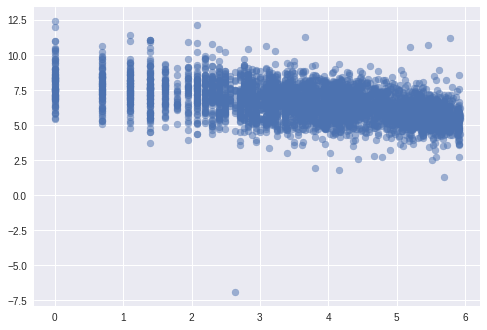

In [42]:
plt.scatter(customer_history.Recency_log, customer_history.Amount_log, alpha=0.5)

# Find Customer Segments Using KMeans

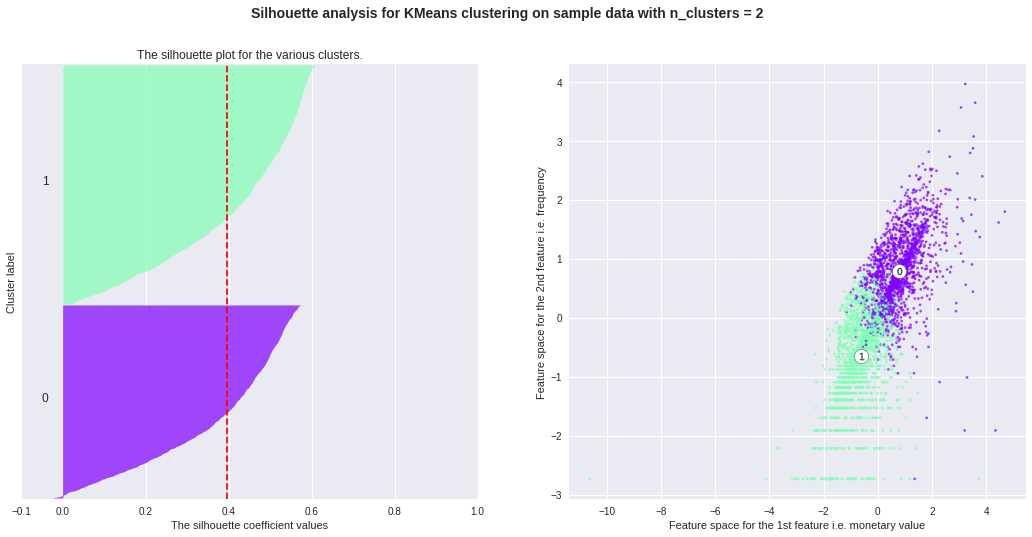

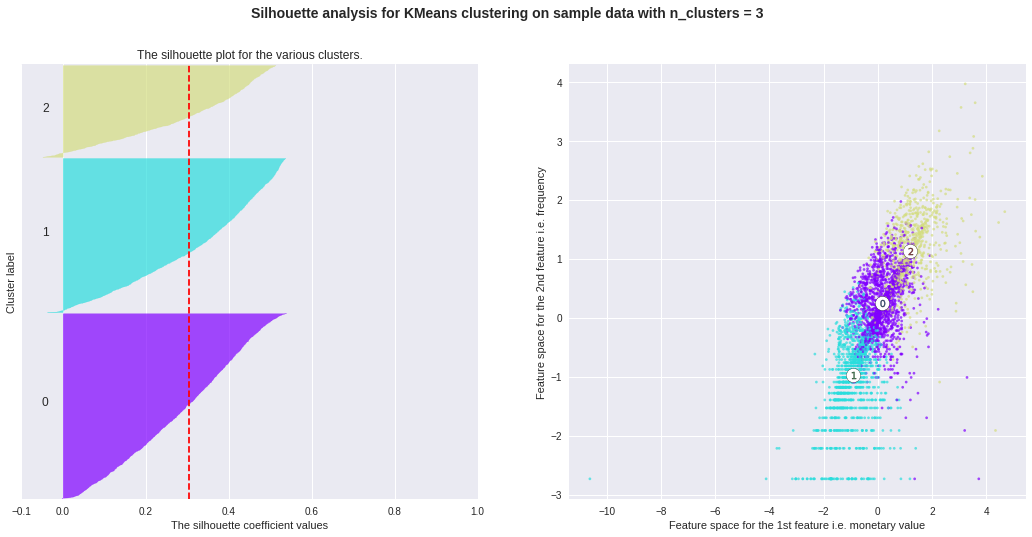

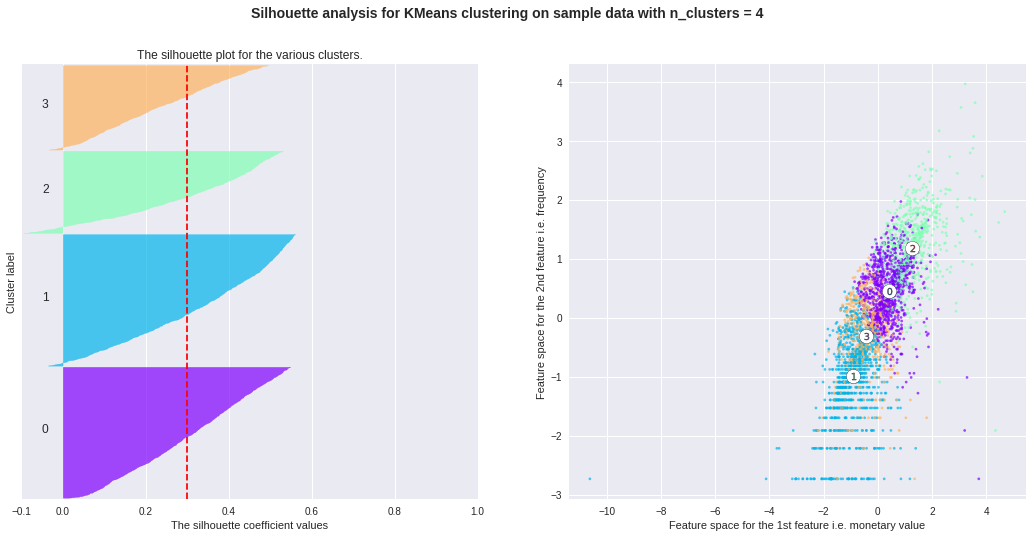

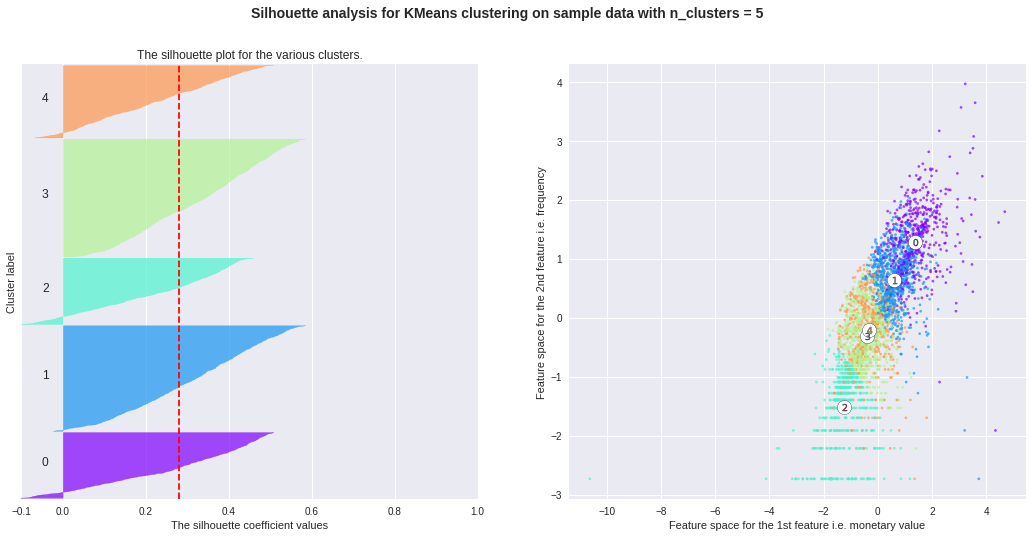

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = X_scaled

centers = dict()

for n_clusters in range(2,6):
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,8)
    ax1.set_xlim([-0.1,0.1])
    ax1.set_ylim([0,len(X)+(n_clusters+1)*10])
    
    clusterer = KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    sil_avg = silhouette_score(X,cluster_labels)
    centers.update({n_clusters:{'cluster_center':clusterer.cluster_centers_,
                                'silhouette_score': sil_avg,
                                'labels':cluster_labels}
                   })
    sample_sil_val = silhouette_samples(X,cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_sil_val = sample_sil_val[cluster_labels==i]
        ith_cluster_sil_val.sort()
        
        size_cluster_i = ith_cluster_sil_val.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.rainbow(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0, ith_cluster_sil_val, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower+0.5*size_cluster_i, str(i))
        y_lower = y_upper+10 #10 for the zero samples 
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=sil_avg, color='red', linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    colors = cm.rainbow(cluster_labels.astype(float)/n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:,feature1],X[:,feature2], marker = '.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    center = clusterer.cluster_centers_
    ax2.scatter(center[:,feature1],center[:,feature2], marker = 'o', s=200, alpha=1, c='white', edgecolor='k')
    
    for i,c in enumerate(center):
        ax2.scatter(c[feature1],c[feature2], marker='$%d$'%i, alpha=1, s=50, edgecolor='k')
        ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
        ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


#### Inspect Cluster Performance and Feature wise Centers

In [44]:
for i in range(2,6):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=['Amount_log', 'Recency_log','Frequency_log']))
    print("Silhouette score for cluster {} is {}". format(i, centers[i]['silhouette_score']))
    print()

for 2 number of clusters
    Amount_log  Recency_log  Frequency_log
0  1882.387664    15.979529     113.171740
1   308.723197    96.013791      16.442814
Silhouette score for cluster 2 is 0.3947793031805252

for 3 number of clusters
    Amount_log  Recency_log  Frequency_log
0   843.937271    44.083222      53.920633
1   221.236034   121.766072      10.668661
2  3159.294272     7.196647     177.789098
Silhouette score for cluster 3 is 0.30437444714898737

for 4 number of clusters
    Amount_log  Recency_log  Frequency_log
0  1142.609449    65.900731      70.592123
1   220.750870   158.876792      10.405813
2  3393.859424     6.704664     191.017534
3   402.811808    17.889282      25.715470
Silhouette score for cluster 4 is 0.29838466776589245

for 5 number of clusters
    Amount_log  Recency_log  Frequency_log
0  3905.544371     5.627973     214.465989
1  1502.519606    46.880212      92.306262
2   142.867249   126.546751       5.147370
3   408.235418   139.056216      25.530424
4   4

In [0]:
#Create Labels for Clusters and Add to Customer History Data 
labels = centers[5]['labels']   
customer_history['Cluster5labels'] = labels
labels = centers[3]['labels']
customer_history['Cluster3labels'] = labels
labels = centers[4]['labels']
customer_history['Cluster4labels'] = labels
labels = centers[2]['labels']
customer_history['Cluster2labels'] = labels

In [46]:
customer_history.head()

,CustomerID,Recency,Frequency,Amount,Recency_log,Frequency_log,Amount_log,Cluster5labels,Cluster3labels,Cluster4labels,Cluster2labels
0,12346.0,326.0,1,77183.601,5.786897,0.000000,11.253942,1,0,0,1
1,12747.0,2.0,103,4196.011,0.693147,4.634729,8.341890,0,2,2,0
2,12748.0,1.0,4596,33719.731,0.000000,8.432942,10.425838,0,2,2,0
3,12749.0,4.0,199,4090.881,1.386294,5.293305,8.316516,0,2,2,0
4,12820.0,3.0,59,942.341,1.098612,4.077537,6.848367,4,2,2,0


In [47]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

In [53]:
!pip3 install --upgrade plotly

    100% |████████████████████████████████| 38.4MB 825kB/s 
  Running setup.py bdist_wheel for retrying ... - done
  Stored in directory: /root/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
  Found existing installation: plotly 1.12.12
    Uninstalling plotly-1.12.12:
      Successfully uninstalled plotly-1.12.12


### Create Cluster Feature Visualization Function

In [0]:
def plot_cluster(cluster_label,field_to_plot,ticks,cutoff_quantile):
    l = len(customer_history[cluster_label].unique())
    x_data = ['Cluster 1']
    x_data = [x_data[0][:len(x_data[0])-1] + str(i) for i in range(1,6)]
    
    colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 
              'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
    cols = []
    y_data = []
    for i in range(l):
        y = customer_history[customer_history[cluster_label]==i][field_to_plot].values
        y_data.append(y[y<np.percentile(y, cutoff_quantile)])
        cols.append(colors[i])
        
    traces = []
    for xd, yd, cls in zip(x_data, y_data, cols):
            traces.append(go.Box(y=yd,name=xd,boxpoints=False,jitter=0.5,whiskerwidth=0.2,fillcolor=cls,
                    marker=dict(size=2,),line=dict(width=1),
            ))

    layout = go.Layout(title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
        yaxis=dict(
            autorange=True,
            showgrid=True,
            zeroline=True,
            dtick= ticks,#50,
            gridcolor='black',
            gridwidth=0.1,
            zerolinecolor='rgb(255, 255, 255)',
            zerolinewidth=2,), 
        margin=dict(l=40,r=30,b=80,t=100,),
        paper_bgcolor='white', plot_bgcolor='white',showlegend=True
    )
    fig = go.Figure(data=traces, layout=layout)
    py.offline.iplot(fig)

In [0]:
plot_cluster('Cluster5labels','Recency',ticks=50, cutoff_quantile = 100)

In [0]:
plot_cluster('Cluster5labels','Recency',ticks=50, cutoff_quantile = 100)

In [0]:
plot_cluster('Cluster5labels','Amount',ticks=1000, cutoff_quantile = 80)

In [0]:
plot_cluster('Cluster5labels','Frequency',ticks=100, cutoff_quantile = 80)

In [0]:
plot_cluster('Cluster3labels','Recency',ticks=50, cutoff_quantile = 100)

In [0]:
plot_cluster('Cluster3labels','Amount',ticks=1000, cutoff_quantile = 80)

In [0]:
plot_cluster('Cluster3labels','Frequency',ticks=100, cutoff_quantile = 90)

In [0]:
plot_cluster('Cluster4labels','Frequency',ticks=100, cutoff_quantile = 90)

# End of Segmentation 

# Write Market Analysis